---

# Final Team Project: Machine Learning IoT Application Design and Implementation
## Team 1 - Jason Raimondi, Sundar Sundaresan, and Viktor Veselov
## University of San Diego
## AAI-530: Data Analytics and IoT
## Professor An Tran
## 2023-02-27

---

### GitHub Repository:
### https://github.com/SweatyCrayfish/Room-Ocupancy-Application
### Final Project - ML IoT Application.ipynb

---

### Tableau Public Dashboard:
### https://public.tableau.com/???

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Exploratory Data Analysis

### Load and clean data

The Room Occupancy Estimation dataset can be located in the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation

First, we will read the dataset from a CSV file and assign to a Pandas dataframe.  Then, we will perform some initial discovery to start exploring and learning the dataset.

In [2]:
# create new dataframe with raw data
df_raw = pd.read_csv('Occupancy_Estimation.csv')

In [3]:
# view shape of dataframe
print ('Total rows in df_raw =', df_raw.shape[0])
print ('Total columns in df_raw =', df_raw.shape[1])

Total rows in df_raw = 10129
Total columns in df_raw = 19


In [4]:
# view dataframe head
df_raw.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


We can see that we have separate columns for Date and Time.  To support our later time-series machine learning prediction, we will plan to combine into a single Datetime column.

In [5]:
# print data types and describe data
print (df_raw.dtypes)
df_raw.describe()

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


We can see that we currently have 17 total numeric features (excluding Date and Time).  For our project, we will be predicting a different feature for each machine learning model developed.  To reduce complexity of our IoT system design, we will be using average values for Temperature, Light, and Sound, which will reduce the number of columns for each of these features from 4 to 1, or from 12 to 3 when considering them all.  We will create copy of the raw data and make these changes now.

In [6]:
# create new dataframe for modifications
df = df_raw.copy()

In [7]:
# create Datetime column

# combine into a single column
df['Datetime'] = df['Date'] + ' ' + df['Time']

# convert to datetime, specify that year comes first in the format
df['Datetime'] = pd.to_datetime(df['Datetime'], yearfirst=True)

In [8]:
# print data types and describe data
print (df.dtypes)
df.head()

Date                            object
Time                            object
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
Datetime                datetime64[ns]
dtype: object


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,2017-12-22 10:49:41
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,2017-12-22 10:50:12
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,2017-12-22 10:50:42
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,2017-12-22 10:51:13
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,2017-12-22 10:51:44


We can see that our Datetime column is now a datetime data type.  Let's check to see if the Date and Time columns are date and time data types.

In [9]:
df['Date'][0]

'2017/12/22'

The Date column does not appear to be a date data type.  Let's also check the Time column.

In [10]:
df['Time'][0]

'10:49:41'

The Time column does not appear to be a time data type.  Let's use our Datetime column to turn the Date and Time columns into date and time data types.

In [11]:
# convert to date and time data types
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

Let's now recheck our Date and Time columns to verify the data types are correct.

In [12]:
df['Date'][0]

datetime.date(2017, 12, 22)

The Date column is now a date data type.

In [13]:
df['Time'][0]

datetime.time(10, 49, 41)

The Time column is now a time data type.

Let's review the describe() results again now that we have a numeric Datetime column that can be included in the results.

In [14]:
# describe, including statistics on Datetime column
df.describe(datetime_is_numeric = True)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559,2017-12-27 20:27:23.034554112
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000,2017-12-22 10:49:41
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000,2017-12-23 09:14:33
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,2017-12-24 07:06:45
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000,2017-12-26 04:58:18
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000,2018-01-11 09:00:09
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633,NaN


We can see that our IoT sensor readings start on 12/22/2017 and end on 1/11/2018.  We can also see the Room Occupany Count ranging from 0 to 3 persons.  Let's check the unique values of Date and Room Occupancy Count.

In [15]:
# print unique Dates
print ('Unique Dates: \n', df['Date'].unique(), '\n')

# print unique Room Occupancy Count
print ('Unique Room Occupancy Count: \n', df['Room_Occupancy_Count'].unique())

Unique Dates: 
 [datetime.date(2017, 12, 22) datetime.date(2017, 12, 23)
 datetime.date(2017, 12, 24) datetime.date(2017, 12, 25)
 datetime.date(2017, 12, 26) datetime.date(2018, 1, 10)
 datetime.date(2018, 1, 11)] 

Unique Room Occupancy Count: 
 [1 2 3 0]


We can see that data was not collected for every day in the entire range of dates, as there is a gap between 12/26/2017 and 1/10/2018.  We can also see that Christmas Day and days surrounding the Holiday are included, so it's possible that these were days when there was no room occupancy.  We can also see that the Room Occupancy does range from 0 to 3 occupants, as was described in the dataset source information.  Our row counts are all equal, so there does not appear to be any missing data.  We will check to be sure.

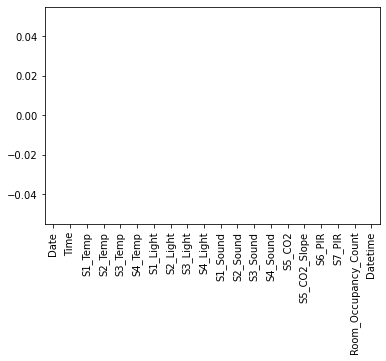

In [16]:
# Visualize any missing data
df.isna().sum().plot.bar();

The bar graph confirms that we are not missing any data.  Our IoT system is based on a single IoT device in a room, versus multiple devices that were used to generate the original dataset.  To adapt the dataset to our IoT system design, we will consolidate Temperature, Light, and Sound columns into corresponding average columns.  This will simulate these readings coming from single sensors, as in our IoT system design.  It will also reduce the complexity of the dataset.

In [17]:
# create new columns for combined (average) temperature, light, and sound
df['Temp'] = (df['S1_Temp'] + df['S2_Temp'] + df['S3_Temp'] + df['S4_Temp'] / 4)
df['Light'] = (df['S1_Light'] + df['S2_Light'] + df['S3_Light'] + df['S4_Light'] / 4)
df['Sound'] = (df['S1_Sound'] + df['S2_Sound'] + df['S3_Sound'] + df['S4_Sound'] / 4)

# view dataframe
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,Temp,Light,Sound
0,2017-12-22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.06,390,0.769231,0,0,1,2017-12-22 10:49:41,80.595,218.0,0.3450
1,2017-12-22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.06,390,0.646154,0,0,1,2017-12-22 10:50:12,80.610,217.0,1.0550
2,2017-12-22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.06,390,0.519231,0,0,1,2017-12-22 10:50:42,80.610,218.0,0.6350
3,2017-12-22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.09,390,0.388462,0,0,1,2017-12-22 10:51:13,80.670,218.0,0.6325
4,2017-12-22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,390,0.253846,0,0,1,2017-12-22 10:51:44,80.670,219.0,0.3150


Let's now drop the separate reading colums for temperature, light, and sound then view our dataframe again.

In [18]:
# drop individual reading columns for temperature, light, and sound
df = df.drop(columns=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp'])
df = df.drop(columns=['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light'])
df = df.drop(columns=['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound'])

# view dataframe
df.head()

,Date,Time,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,Temp,Light,Sound
0,2017-12-22,10:49:41,390,0.769231,0,0,1,2017-12-22 10:49:41,80.595,218.0,0.3450
1,2017-12-22,10:50:12,390,0.646154,0,0,1,2017-12-22 10:50:12,80.610,217.0,1.0550
2,2017-12-22,10:50:42,390,0.519231,0,0,1,2017-12-22 10:50:42,80.610,218.0,0.6350
3,2017-12-22,10:51:13,390,0.388462,0,0,1,2017-12-22 10:51:13,80.670,218.0,0.6325
4,2017-12-22,10:51:44,390,0.253846,0,0,1,2017-12-22 10:51:44,80.670,219.0,0.3150


Now, we will rename and reorder a few columns before moving forward.

In [19]:
# columns to rename
renaming = {'S5_CO2': 'CO2', 
            'S5_CO2_Slope': 'CO2_Slope', 
            'S6_PIR': 'PIR_S1', 
            'S7_PIR': 'PIR_S2',}

# rename columns in existing dataframe
df = df.rename(renaming, axis=1)

# reorder columns in existing dataframe
df = df[['Datetime', 'Date', 'Time', 'Temp', 'Light', 'Sound', 'CO2', 'CO2_Slope', 'PIR_S1', 'PIR_S2', 'Room_Occupancy_Count']]

# view dataframe
df.head()

,Datetime,Date,Time,Temp,Light,Sound,CO2,CO2_Slope,PIR_S1,PIR_S2,Room_Occupancy_Count
0,2017-12-22 10:49:41,2017-12-22,10:49:41,80.595,218.0,0.3450,390,0.769231,0,0,1
1,2017-12-22 10:50:12,2017-12-22,10:50:12,80.610,217.0,1.0550,390,0.646154,0,0,1
2,2017-12-22 10:50:42,2017-12-22,10:50:42,80.610,218.0,0.6350,390,0.519231,0,0,1
3,2017-12-22 10:51:13,2017-12-22,10:51:13,80.670,218.0,0.6325,390,0.388462,0,0,1
4,2017-12-22 10:51:44,2017-12-22,10:51:44,80.670,219.0,0.3150,390,0.253846,0,0,1


In [20]:
# describe dataframe
df.describe(datetime_is_numeric = True)

,Datetime,Temp,Light,Sound,CO2,CO2_Slope,PIR_S1,PIR_S2,Room_Occupancy_Count
count,10129,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,2017-12-27 20:27:23.034554112,82.495223,89.014908,0.472323,460.860401,-0.004830,0.090137,0.079574,0.398559
min,2017-12-22 10:49:41,80.595000,0.000000,0.165000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,2017-12-23 09:14:33,81.442500,0.000000,0.195000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,2017-12-24 07:06:45,82.152500,0.000000,0.205000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,2017-12-26 04:58:18,83.007500,92.000000,0.225000,465.000000,0.000000,0.000000,0.000000,0.000000
max,2018-01-11 09:00:09,87.370000,720.250000,11.380000,1270.000000,8.980769,1.000000,1.000000,3.000000
std,NaN,1.359938,166.377263,0.856572,199.964940,1.164990,0.286392,0.270645,0.893633


No further cleaning appears to be necessary for this dataset.

### Visualizing the data

Let's create some visualizations to get a better understanding of the dataset and distribution of data.  We will start with histograms and boxplots.

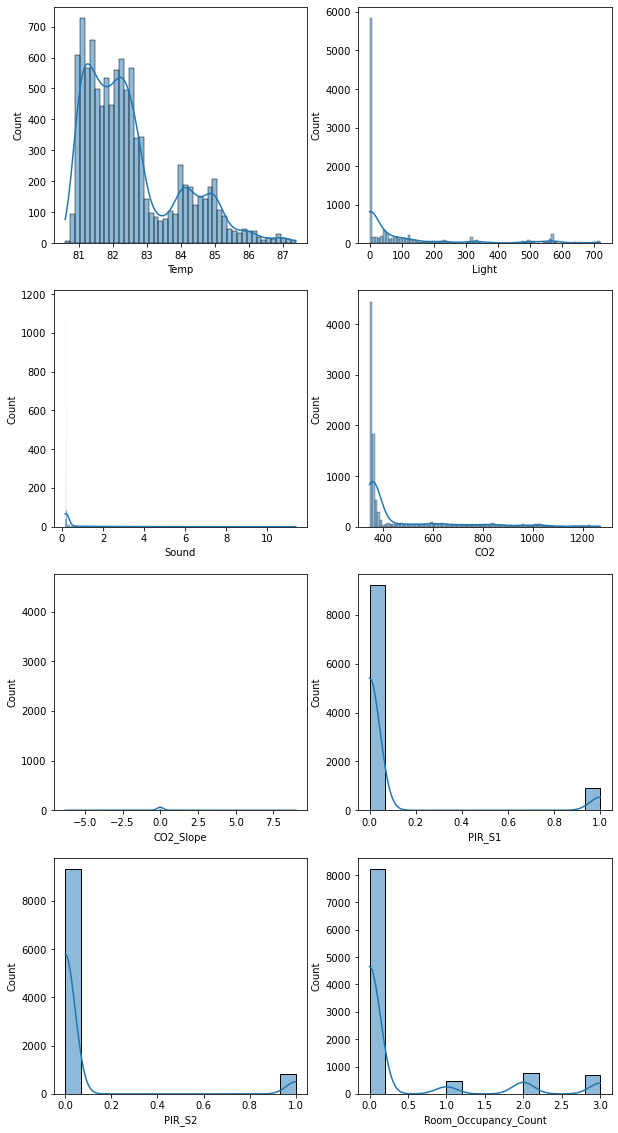

In [21]:
# create histograms for each feature
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

sns.histplot(data=df, x='Temp', kde=True, ax=axs[0, 0])
sns.histplot(data=df, x='Light', kde=True, ax=axs[0, 1])
sns.histplot(data=df, x='Sound', kde=True, ax=axs[1, 0])
sns.histplot(data=df, x='CO2', kde=True, ax=axs[1, 1])
sns.histplot(data=df, x='CO2_Slope', kde=True, ax=axs[2, 0])
sns.histplot(data=df, x='PIR_S1', kde=True, ax=axs[2, 1])
sns.histplot(data=df, x='PIR_S2', kde=True, ax=axs[3, 0])
sns.histplot(data=df, x='Room_Occupancy_Count', kde=True, ax=axs[3, 1])

plt.show()

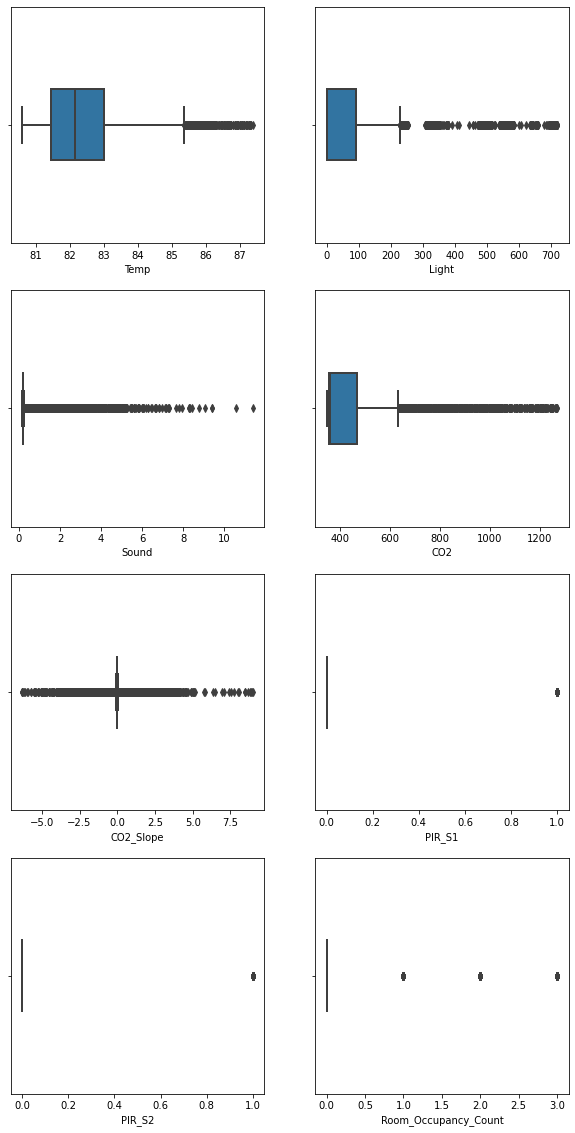

In [22]:
# create boxplots for each feature
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

sns.boxplot(data=df, x='Temp', width=.3, linewidth=2, fliersize=5, ax=axs[0, 0])
sns.boxplot(data=df, x='Light', width=.3, linewidth=2, fliersize=5, ax=axs[0, 1])
sns.boxplot(data=df, x='Sound', width=.3, linewidth=2, fliersize=5, ax=axs[1, 0])
sns.boxplot(data=df, x='CO2', width=.3, linewidth=2, fliersize=5, ax=axs[1, 1])
sns.boxplot(data=df, x='CO2_Slope', width=.3, linewidth=2, fliersize=5, ax=axs[2, 0])
sns.boxplot(data=df, x='PIR_S1', width=.3, linewidth=2, fliersize=5, ax=axs[2, 1])
sns.boxplot(data=df, x='PIR_S2', width=.3, linewidth=2, fliersize=5, ax=axs[3, 0])
sns.boxplot(data=df, x='Room_Occupancy_Count', width=.3, linewidth=2, fliersize=5, ax=axs[3, 1])

plt.show()

We can see that the Room Occupancy is empty (i.e., 0) for the majority of the time readings were collected.  This explains why most of our data does not appear to be normally distributed.  Most values are skewed to the left, indicating no or low sensor readings while rooms are vacant.  We will likely need to consider data tranformations and/or normalizations prior to training our machine learning models.

## Machine Learning Tasks

### Task 1 - Deep Learning LSTM Time Series Prediction

For our Deep Learning Long Short Term Memory (LSTM) Time Series prediction, we will begin by making a copy of our dataframe and normalize the data so that they are on similar scales.

In [23]:
# Start with normalizing data here in new dataframe???...
df_lstm = df.copy()

### Task 2 - Multiple Regression Prediction

For our Multiple Regression prediction, we will first determine which features we would like to include in the model, and we will make sure there isn't significant multicollinearity present.

In [24]:
# Start with new dataframe here???...
df_mr = df.copy()

## Results